In [17]:
import subprocess
import sys
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from gprofiler import GProfiler
from pyvis.network import Network

# Define the STRING API URL and parameters
def fetch_string_data(identifier, species=9606):
    """
    Fetch protein interaction data from STRING database for a given identifier.
    """
    base_url = "https://string-db.org/api"
    output_format = "tsv"
    method = "network"
    request_url = f"{base_url}/{output_format}/{method}?identifiers={identifier}&species={species}"
    
    response = requests.get(request_url)
    data = [line.split("\t") for line in response.text.strip().split("\n")]
    columns = data[0]
    rows = data[1:]
    
    df = pd.DataFrame(rows, columns=columns)
    return df

def plot_interaction_network(df, output_file="network.html"):
    """
    Plot the protein interaction network using pyvis for interactivity.
    """
    G = nx.Graph()
    
    for _, row in df.iterrows():
        G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=float(row["score"]))
    
    net = Network(notebook=True, cdn_resources='remote')
    net.from_nx(G)
    net.show(output_file)

def perform_enrichment_analysis(proteins):
    """
    Perform functional enrichment analysis using g:Profiler.
    """
    gp = GProfiler(return_dataframe=True)
    enrichment_results = gp.profile(organism='hsapiens', query=proteins)
    return enrichment_results

def main():
    #identifier = "9606.ENSP00000269305"  # STRING identifier for human TP53
    identifier = "9606.ENSP00000275493"  # STRING identifier for human TP53

    # Fetch and save interaction data
    df_interactions = fetch_string_data(identifier)
    df_interactions.to_csv("TP53_interactions_enrich_2.csv", index=False)
    
    # Load interaction data
    df_interactions = pd.read_csv("TP53_interactions_enrich_2.csv")
    
    # Plot and save the interactive network graph
    plot_interaction_network(df_interactions)
    
    # Extract the list of interacting proteins
    proteins = df_interactions["preferredName_B"].unique().tolist()
    
    # Perform and save enrichment analysis
    enrichment_results = perform_enrichment_analysis(proteins)
    enrichment_results.to_csv("TP53_enrichment_analysis_2.csv", index=False)
    
    # Display the top 10 results of the interaction and enrichment data
    print("Top 10 interactions:")
    df_interactions.head()
    print("\nEnrichment analysis results:")
    enrichment_results.head()

if __name__ == "__main__":
    main()


network.html
Top 10 interactions:
             stringId_A            stringId_B preferredName_A preferredName_B  \
0  9606.ENSP00000052754  9606.ENSP00000267101             DCN           ERBB3   
1  9606.ENSP00000052754  9606.ENSP00000265171             DCN             EGF   
2  9606.ENSP00000052754  9606.ENSP00000269571             DCN           ERBB2   
3  9606.ENSP00000052754  9606.ENSP00000275493             DCN            EGFR   
4  9606.ENSP00000230990  9606.ENSP00000261769           HBEGF            CDH1   
5  9606.ENSP00000230990  9606.ENSP00000262995           HBEGF            GAB1   
6  9606.ENSP00000230990  9606.ENSP00000263967           HBEGF          PIK3CA   
7  9606.ENSP00000230990  9606.ENSP00000264033           HBEGF             CBL   
8  9606.ENSP00000230990  9606.ENSP00000269571           HBEGF           ERBB2   
9  9606.ENSP00000230990  9606.ENSP00000244869           HBEGF            EREG   

   ncbiTaxonId  score  nscore  fscore  pscore  ascore  escore  dscore  tsc

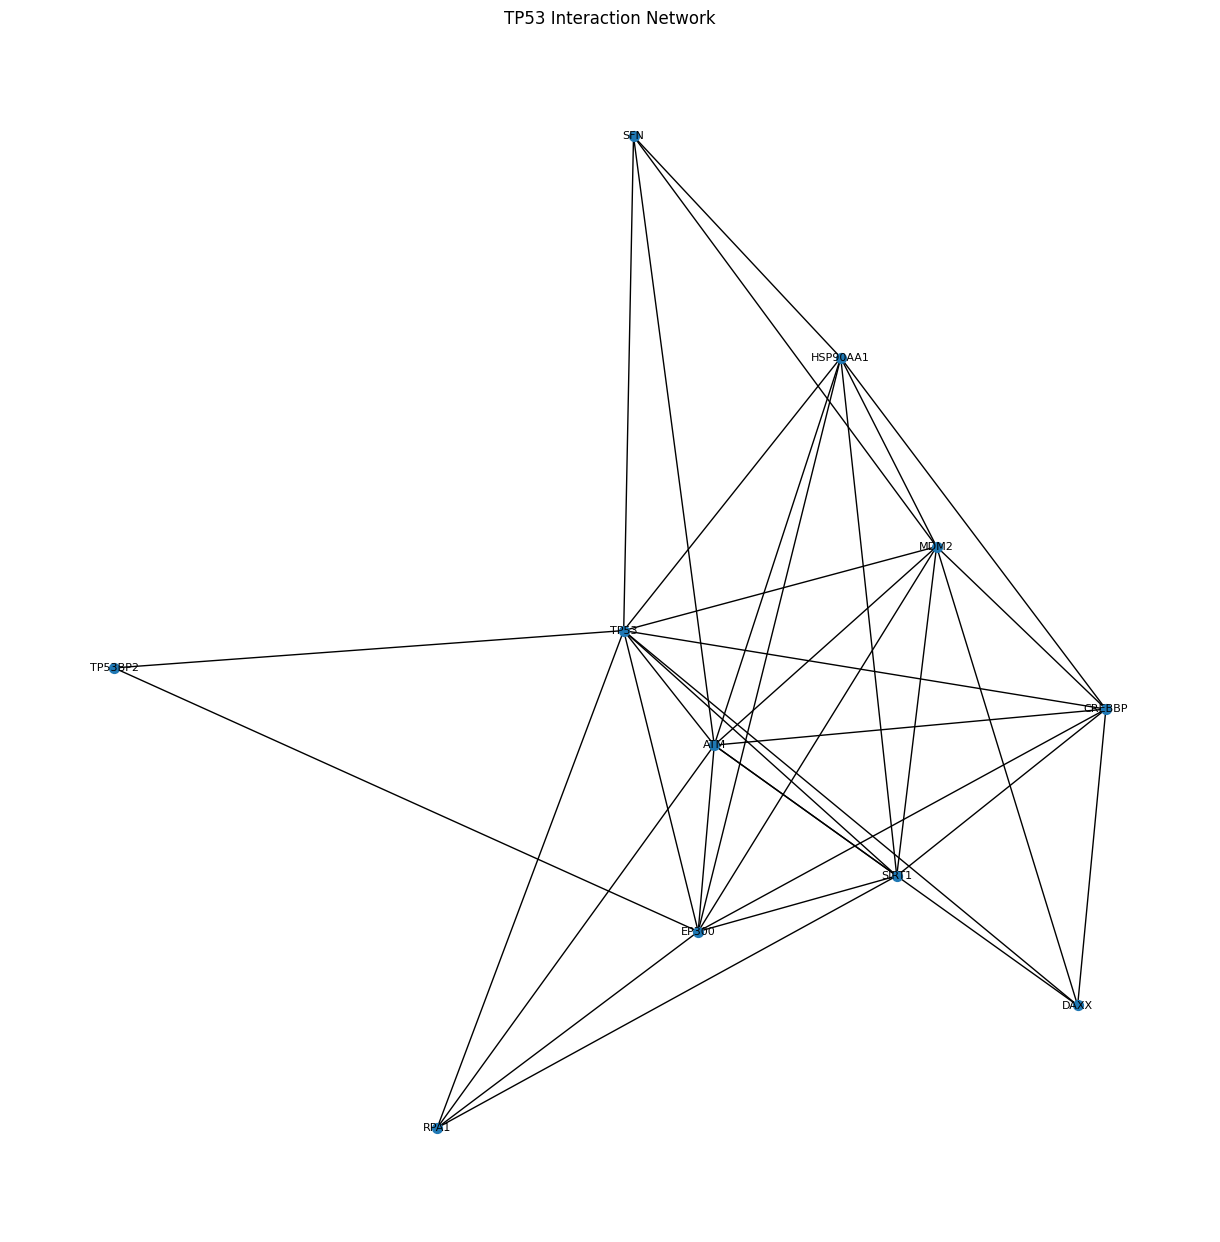

In [12]:
## Network Analysis with networkx and matplotlib 

import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Define the STRING API URL and parameters
base_url = "https://string-db.org/api"
output_format = "tsv"
method = "network"
identifier = "9606.ENSP00000269305"  # STRING identifier for human TP53
species = 9606  # Taxonomy ID for Homo sapiens

# Construct the request URL
request_url = f"{base_url}/{output_format}/{method}?identifiers={identifier}&species={species}"

# Send the request and get the response
response = requests.get(request_url)

# Parse the response
data = [line.split("\t") for line in response.text.strip().split("\n")]
columns = data[0]
rows = data[1:]

# Create a DataFrame
df = pd.DataFrame(rows, columns=columns)

# Save the data to a CSV file
df.to_csv("TP53_interactions.csv", index=False)

# Load the interaction data
df = pd.read_csv("TP53_interactions.csv")

# Create a graph
G = nx.Graph()

# Add nodes and edges
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=float(row["score"]))

# Draw the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)
plt.title("TP53 Interaction Network")
plt.show()


In [13]:
## Enrichment Analysis with g:Profiler

import requests
import pandas as pd
from gprofiler import GProfiler

# Define the STRING API URL and parameters
base_url = "https://string-db.org/api"
output_format = "tsv"
method = "network"
identifier = "9606.ENSP00000269305"  # STRING identifier for human TP53
species = 9606  # Taxonomy ID for Homo sapiens

# Construct the request URL
request_url = f"{base_url}/{output_format}/{method}?identifiers={identifier}&species={species}"

# Send the request and get the response
response = requests.get(request_url)

# Parse the response
data = [line.split("\t") for line in response.text.strip().split("\n")]
columns = data[0]
rows = data[1:]

# Create a DataFrame
df = pd.DataFrame(rows, columns=columns)

# Save the data to a CSV file
df.to_csv("TP53_interactions.csv", index=False)

# Load the interaction data
df = pd.read_csv("TP53_interactions.csv")

# Initialize the GProfiler
gp = GProfiler(return_dataframe=True)

# Extract the list of interacting proteins
proteins = df["preferredName_B"].unique().tolist()

# Perform the enrichment analysis
enrichment_results = gp.profile(organism='hsapiens', query=proteins)

# Save the results
enrichment_results.to_csv("TP53_enrichment_analysis.csv", index=False)

# Display the results
print(enrichment_results.head())


  source              native                                   name  \
0  GO:MF          GO:0002039                            p53 binding   
1   REAC  REAC:R-HSA-3700989     Transcriptional Regulation by TP53   
2   REAC  REAC:R-HSA-5633007            Regulation of TP53 Activity   
3  GO:BP          GO:0097193  intrinsic apoptotic signaling pathway   
4  GO:BP          GO:0034605              cellular response to heat   

        p_value  significant  \
0  4.553857e-11         True   
1  1.157424e-10         True   
2  4.246291e-09         True   
3  2.175352e-08         True   
4  6.082699e-08         True   

                                         description  term_size  query_size  \
0  "Binding to one of the p53 family of proteins....         69          10   
1                 Transcriptional Regulation by TP53        359          10   
2                        Regulation of TP53 Activity        160          10   
3  "The series of molecular signals in which an i...        315 

In [1]:
##  Interactive Network Visualization with pyvis

import requests
import pandas as pd
import networkx as nx
from pyvis.network import Network

# Define the STRING API URL and parameters
base_url = "https://string-db.org/api"
output_format = "tsv"
method = "network"
identifier = "9606.ENSP00000269305"  # STRING identifier for human TP53
species = 9606  # Taxonomy ID for Homo sapiens

# Construct the request URL
request_url = f"{base_url}/{output_format}/{method}?identifiers={identifier}&species={species}"

# Send the request and get the response
response = requests.get(request_url)

# Parse the response
data = [line.split("\t") for line in response.text.strip().split("\n")]
columns = data[0]
rows = data[1:]

# Create a DataFrame
df = pd.DataFrame(rows, columns=columns)

# Save the data to a CSV file
df.to_csv("TP53_interactions.csv", index=False)

# Load the interaction data
df = pd.read_csv("TP53_interactions.csv")

# Create a graph
G = nx.Graph()

# Add nodes and edges
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=float(row["score"]))

# Create a Pyvis Network
net = Network(notebook=True)
net.from_nx(G)
net.show("network.html")


network.html


In [15]:
## Combining Network Analysis and Enrichment Analysis

import requests
import pandas as pd
import networkx as nx
from pyvis.network import Network
from gprofiler import GProfiler

# Fetch STRING data
def fetch_string_data(identifier, species=9606):
    base_url = "https://string-db.org/api"
    output_format = "tsv"
    method = "network"
    request_url = f"{base_url}/{output_format}/{method}?identifiers={identifier}&species={species}"
    
    response = requests.get(request_url)
    data = [line.split("\t") for line in response.text.strip().split("\n")]
    columns = data[0]
    rows = data[1:]
    df = pd.DataFrame(rows, columns=columns)
    return df

# Plot network using Pyvis
def plot_interaction_network(df):
    G = nx.Graph()
    for _, row in df.iterrows():
        G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=float(row["score"]))
    
    net = Network(notebook=True)
    net.from_nx(G)
    net.show("network.html")

# Perform enrichment analysis using g:Profiler
def perform_enrichment_analysis(proteins):
    gp = GProfiler(return_dataframe=True)
    enrichment_results = gp.profile(organism='hsapiens', query=proteins)
    return enrichment_results

def main():
    identifier = "9606.ENSP00000269305"
    df_interactions = fetch_string_data(identifier)
    df_interactions.to_csv("TP53_interactions.csv", index=False)
    df_interactions = pd.read_csv("TP53_interactions.csv")
    
    # Plot interactive network
    plot_interaction_network(df_interactions)
    
    # Enrichment analysis
    proteins = df_interactions["preferredName_B"].unique().tolist()
    enrichment_results = perform_enrichment_analysis(proteins)
    enrichment_results.to_csv("TP53_enrichment_analysis.csv", index=False)
    
    # Display results
    print("Top 10 interactions:")
    print(df_interactions.head(10))
    print("\nEnrichment analysis results:")
    print(enrichment_results.head(10))

if __name__ == "__main__":
    main()


network.html
Top 10 interactions:
             stringId_A            stringId_B preferredName_A preferredName_B  \
0  9606.ENSP00000212015  9606.ENSP00000254719           SIRT1            RPA1   
1  9606.ENSP00000212015  9606.ENSP00000258149           SIRT1            MDM2   
2  9606.ENSP00000212015  9606.ENSP00000262367           SIRT1          CREBBP   
3  9606.ENSP00000212015  9606.ENSP00000335153           SIRT1        HSP90AA1   
4  9606.ENSP00000212015  9606.ENSP00000278616           SIRT1             ATM   
5  9606.ENSP00000212015  9606.ENSP00000263253           SIRT1           EP300   
6  9606.ENSP00000212015  9606.ENSP00000269305           SIRT1            TP53   
7  9606.ENSP00000254719  9606.ENSP00000263253            RPA1           EP300   
8  9606.ENSP00000254719  9606.ENSP00000278616            RPA1             ATM   
9  9606.ENSP00000254719  9606.ENSP00000269305            RPA1            TP53   

   ncbiTaxonId  score  nscore  fscore  pscore  ascore  escore  dscore  tsc